In [2]:
# Monty Hall Problem

# Tre porte. Due hanno una capra, una ha la Ferrari che vuoi vincere.
# Devi scegliere una porta, senza aprirla
# Viene aperta un'altra delle due porte e vedi che c'è una capra.
#### Puoi scegliere se tenere la tua porta o cambiarla con l'altra chiusa.
# p1 la tiene, p2 la cambia, p3 non sa nulla della porta aperta prima.
## chi ha la maggiore probabilità di vincere?

# Simula tre porte, one car and two goats. Simula tre player. Switcher, Conservative, Newcomer. p(Win)=?

import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['font.size'] = 20

# SETUP OF THE SYSTEM
score = np.array([0,0,0]) 
N = 1000
DOORS = 3

for i in range(N):
    v = np.arange(DOORS)
    
    pick = np.random.choice(v)         # Contestant #1
    car = np.random.choice(v)
    
    w = np.delete(v,(pick,car))
    goats = np.random.choice(w, size=DOORS-2, replace=False)
    
    left = np.delete(v,(goats))   
    # car = np.random.choice(left) 
            # NON CAPISCO. Perché se lo metto qui, le probabilità tornano a 1/2?
    switch = left[left != pick]        # Contestant #2
    late = np.random.choice(left)      # Contestant #3
    
    # conservative
    if pick == car:
        score[0]+=1
    # switcher
    if switch == car:
        score[1]+=1
    # latecomer
    if late == car:
        score[2]+=1

print( '%Keep =', score[0]/N )
print( '%Switch =', score[1]/N )
print( '%Late =', score[2]/N )

%Keep = 0.334
%Switch = 0.666
%Late = 0.512


In [3]:
def Monty_Hall(N_DOORS):    
    S1=np.zeros(N_DOORS+1-3)
    S2=np.zeros(N_DOORS+1-3)
    S3=np.zeros(N_DOORS+1-3)
    
    for DOORS in range(3, N_DOORS+1, 1):
        N = 1000
        score = np.array([0,0,0]) 
        for i in range(N):
            v = np.arange(DOORS)

            pick = np.random.choice(v)         # Contestant #1
            car = np.random.choice(v)

            w = np.delete(v,(pick,car))
            goats = np.random.choice(w, size=DOORS-2, replace=False)

            left = np.delete(v,(goats))   
            # car = np.random.choice(left) 
                    # NON CAPISCO. Perché se lo metto qui, le probabilità tornano a 1/2?
            switch = left[left != pick]        # Contestant #2
            late = np.random.choice(left)      # Contestant #3

            # conservative
            if pick == car:
                score[0]+=1
            # switcher
            if switch == car:
                score[1]+=1
            # latecomer
            if late == car:
                score[2]+=1
        
        S1[DOORS-3] = score[0]/N
        S2[DOORS-3] = score[1]/N
        S3[DOORS-3] = score[2]/N
        
    return S1,S2,S3

N_DOORS = 100
S1,S2,S3 = Monty_Hall(N_DOORS)

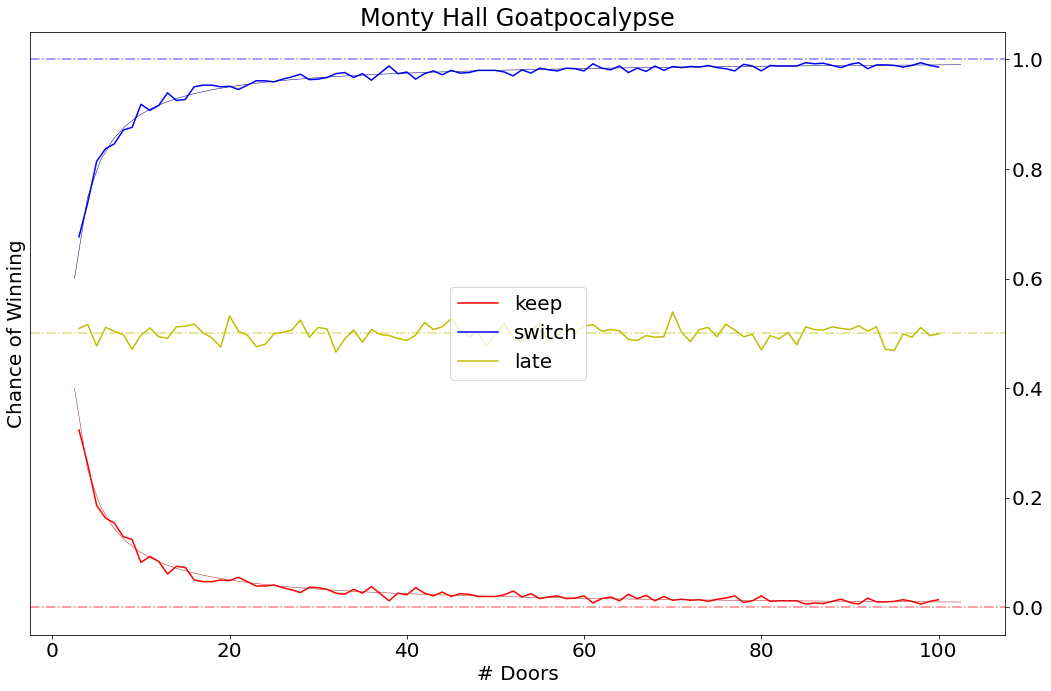

In [9]:
N = np.arange(3, N_DOORS+1, 1)
for S, tag, col in zip([S1,S2,S3],['keep','switch','late'],['r','b','y']):
    plt.plot(N,S, label=tag, color=col)
plt.legend(loc = 'center')
plt.title('Monty Hall Goatpocalypse')
plt.ylabel('Chance of Winning')
plt.xlabel('# Doors')
ax = plt.gca()
ax.yaxis.tick_right()
plt.axhline(0, c='r', ls='-.', alpha=0.5)
plt.axhline(1, c='b', ls='-.', alpha=0.5)
plt.axhline(0.5, c='y', ls='-.', alpha=0.5)
plt.tight_layout()

N = np.linspace(2.5,102.5, 70)
plt.plot(N, 1/N, c='firebrick', lw=0.5, ls='-')
plt.plot(N, (N-1)/N, c='navy', lw=0.5, ls='-')

One simple calculation allows to recover the analytic function $f(N)$ describing how the chance of winning evolves for both the *keeper* and the *switcher*: one goes as $1/N$, and the other one simply goes as $1-1/N$!